<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/KMeans_on_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AIDAWeek06_InClass_WineQualityRed.csv to AIDAWeek06_InClass_WineQualityRed.csv


In [ ]:
wine_data = pd.read_csv('AIDAWeek06_InClass_WineQualityRed.csv')
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data_x = wine_data.iloc[:,0:11]
print(wine_data_x.columns)
#standardise the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
wine_data_z = min_max_scaler.fit_transform(wine_data_x)
wine_data_z

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [ ]:
cluster_range = range(2,10)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 2)
  clusters.fit(wine_data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range,"cluster_errors": cluster_errors})
clusters_df


,num_clusters,cluster_errors
0,2,239.183110
1,3,208.844451
2,4,183.868951
3,5,167.335401
4,6,158.794067
5,7,148.000654
6,8,145.825024
7,9,136.777471


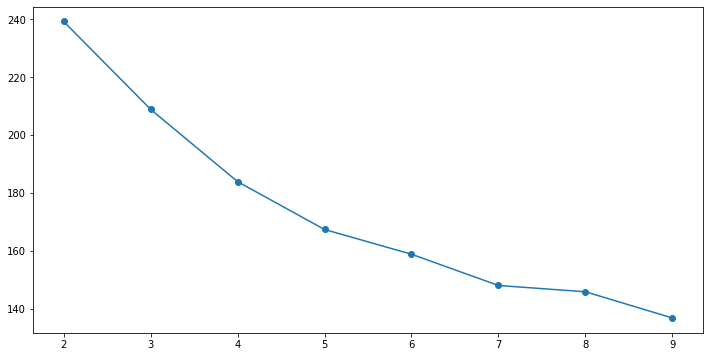

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker = 'o');

In [ ]:
cluster = KMeans(n_clusters = 6, random_state = 1)
cluster.fit(wine_data_z)

wine_data_x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Group'],
      dtype='object')

In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[0.33213154, 0.16053611, 0.41074074, 0.10288066, 0.10373256,
        0.17408567, 0.0915238 , 0.38537191, 0.43264962, 0.22991055,
        0.49566318],
       [0.16252212, 0.33726027, 0.07785   , 0.09167808, 0.09617696,
        0.25070423, 0.12392226, 0.31143172, 0.59346457, 0.18002994,
        0.50421795],
       [0.26540448, 0.35148572, 0.12267658, 0.09141544, 0.12275726,
        0.14952354, 0.1103879 , 0.49077046, 0.48264204, 0.15929479,
        0.22131351],
       [0.57148199, 0.20168098, 0.51073944, 0.13011287, 0.12931764,
        0.13405078, 0.08903598, 0.6404883 , 0.3387213 , 0.23011723,
        0.31119538],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451],
       [0.32266181, 0.28046378, 0.30366013, 0.15679559, 0.12692723,
        0.3854368 , 0.29688907, 0.54776952, 0.43443467, 0.1778404 ,
        0.2109938 ]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z))
prediction = cluster.predict(wine_data_z)
print(prediction)

wine_data_x['Group'] = pd.DataFrame(prediction, columns = ['Group'])
print(wine_data_x.head(20))

print(wine_data_x.groupby('Group').count())
print(wine_data.groupby('quality').count())

[2 2 2 ... 1 1 0]
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.50